In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import requests
from mechafil import data as data_starboard
from mechafil import data_spacescope

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date

In [2]:
start_date = date(2021,3,15)
end_date = datetime.today().date() - timedelta(days=1)

def get_err(df, key):
    err = df['spacescope_' + key] - df['starboard_' + key]
    return err

In [3]:
bp_starboard = data_starboard.query_historical_baseline_power()
bp_spacescope = data_spacescope.query_historical_baseline_power()

rbp_starboard = data_starboard.query_historical_rb_power()
rbp_spacescope = data_spacescope.query_historical_rb_power()

qap_starboard = data_starboard.query_historical_qa_power()
qap_spacescope = data_spacescope.query_historical_qa_power()

<IPython.core.display.Javascript object>


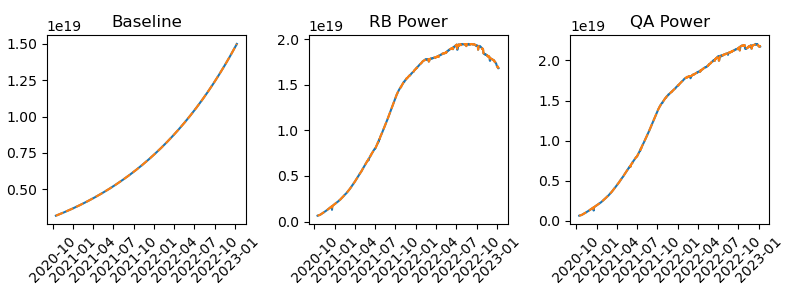

In [4]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.plot(bp_starboard['date'], bp_starboard['baseline'])
plt.plot(bp_spacescope['date'], bp_spacescope['baseline'], linestyle='--')
plt.xticks(rotation=45)
plt.title('Baseline')

plt.subplot(1,3,2)
plt.plot(rbp_starboard['date'], rbp_starboard['rb_power'])
plt.plot(rbp_spacescope['date'], rbp_starboard['rb_power'], linestyle='--')
plt.xticks(rotation=45)
plt.title('RB Power')

plt.subplot(1,3,3)
plt.plot(qap_starboard['date'], qap_starboard['qa_power'])
plt.plot(qap_spacescope['date'], qap_starboard['qa_power'], linestyle='--')
plt.xticks(rotation=45)
plt.title('QA Power')

plt.tight_layout()

In [5]:
onboarded_power_starboard = data_starboard.query_starboard_daily_power_onboarded(start_date, end_date)
onboarded_power_spacescope = data_spacescope.query_spacescope_daily_power_onboarded(start_date, end_date)

cols = onboarded_power_starboard.columns
new_name_mapping = {}
for c in cols:
    if 'date' not in c:
        new_name_mapping[c] = 'starboard_' + c
onboarded_power_starboard = onboarded_power_starboard.rename(columns=new_name_mapping)

cols = onboarded_power_spacescope.columns
new_name_mapping = {}
for c in cols:
    if 'date' not in c:
        new_name_mapping[c] = 'spacescope_' + c
onboarded_power_spacescope = onboarded_power_spacescope.rename(columns=new_name_mapping)

power_df_merged = onboarded_power_spacescope.merge(onboarded_power_starboard, on='date')

<IPython.core.display.Javascript object>


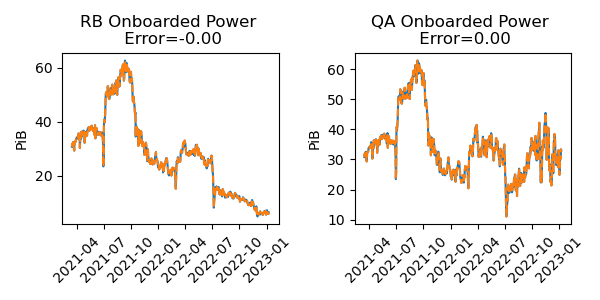

In [6]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.plot(power_df_merged['date'], power_df_merged['starboard_day_onboarded_rb_power_pib'])
plt.plot(power_df_merged['date'], power_df_merged['spacescope_day_onboarded_rb_power_pib'], linestyle='--')
err = get_err(power_df_merged, 'day_onboarded_rb_power_pib')
plt.xticks(rotation=45)
plt.ylabel('PiB')
plt.title('RB Onboarded Power \n Error=%0.02f' % (np.sum(err),))

plt.subplot(1,2,2)
plt.plot(power_df_merged['date'], power_df_merged['starboard_day_onboarded_qa_power_pib'])
plt.plot(power_df_merged['date'], power_df_merged['spacescope_day_onboarded_qa_power_pib'], linestyle='--')
err = get_err(power_df_merged, 'day_onboarded_qa_power_pib')
plt.xticks(rotation=45)
plt.ylabel('PiB')
plt.title('QA Onboarded Power \n Error=%0.02f' % (np.sum(err),))

plt.tight_layout()

In [7]:
supply_starboard = data_starboard.query_starboard_supply_stats(start_date, end_date)
supply_spacescope = data_spacescope.query_spacescope_supply_stats(start_date, end_date)

# align dates to properly compute error
supply_starboard = supply_starboard.rename(
    columns={
        'circulating_fil': 'starboard_circulating_fil',
        'mined_fil': 'starboard_mined_fil',
        'vested_fil': 'starboard_vested_fil',
        'locked_fil': 'starboard_locked_fil',
        'burnt_fil': 'starboard_burnt_fil'
    }
)
supply_spacescope = supply_spacescope.rename(
    columns={
        'circulating_fil': 'spacescope_circulating_fil',
        'mined_fil': 'spacescope_mined_fil',
        'vested_fil': 'spacescope_vested_fil',
        'locked_fil': 'spacescope_locked_fil',
        'burnt_fil': 'spacescope_burnt_fil'
    }
)
supply_df_merged = supply_spacescope.merge(supply_starboard, on='date')

<IPython.core.display.Javascript object>


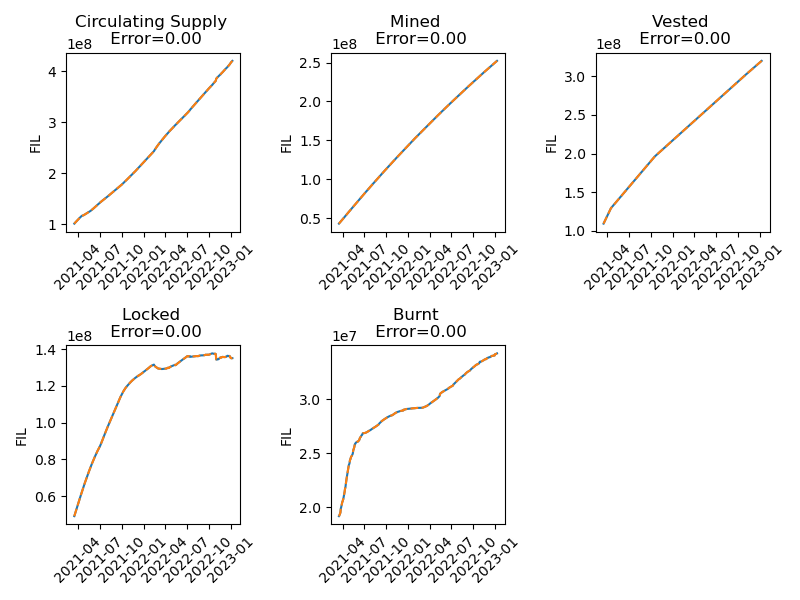

In [8]:
plt.figure(figsize=(8,6))

plt.subplot(2,3,1)
plt.plot(supply_df_merged['date'], supply_df_merged['starboard_circulating_fil'])
plt.plot(supply_df_merged['date'], supply_df_merged['spacescope_circulating_fil'], linestyle='--')
error = get_err(supply_df_merged, 'circulating_fil')
plt.xticks(rotation=45)
plt.ylabel('FIL')
plt.title('Circulating Supply \n Error=%0.02f' % (np.sum(error,)))

plt.subplot(2,3,2)
plt.plot(supply_df_merged['date'], supply_df_merged['starboard_mined_fil'])
plt.plot(supply_df_merged['date'], supply_df_merged['spacescope_mined_fil'], linestyle='--')
error = get_err(supply_df_merged, 'mined_fil')
plt.xticks(rotation=45)
plt.ylabel('FIL')
plt.title('Mined \n Error=%0.02f' % (np.sum(error,)))

plt.subplot(2,3,3)
plt.plot(supply_df_merged['date'], supply_df_merged['starboard_vested_fil'])
plt.plot(supply_df_merged['date'], supply_df_merged['spacescope_vested_fil'], linestyle='--')
error = get_err(supply_df_merged, 'vested_fil')
plt.xticks(rotation=45)
plt.ylabel('FIL')
plt.title('Vested \n Error=%0.02f' % (np.sum(error,)))

plt.subplot(2,3,4)
plt.plot(supply_df_merged['date'], supply_df_merged['starboard_locked_fil'])
plt.plot(supply_df_merged['date'], supply_df_merged['spacescope_locked_fil'], linestyle='--')
error = get_err(supply_df_merged, 'locked_fil')
plt.xticks(rotation=45)
plt.ylabel('FIL')
plt.title('Locked \n Error=%0.02f' % (np.sum(error,)))

plt.subplot(2,3,5)
plt.plot(supply_df_merged['date'], supply_df_merged['starboard_burnt_fil'])
plt.plot(supply_df_merged['date'], supply_df_merged['spacescope_burnt_fil'], linestyle='--')
error = get_err(supply_df_merged, 'burnt_fil')
plt.xticks(rotation=45)
plt.ylabel('FIL')
plt.title('Burnt \n Error=%0.02f' % (np.sum(error,)))

plt.tight_layout()

In [9]:
# test potential-expire by checking into the future
end_date_expire = end_date + timedelta(days=360)

starboard_scheduled_df = data_starboard.query_starboard_sector_expirations(start_date, end_date_expire)
spacescope_scheduled_df = data_spacescope.query_spacescope_sector_expirations(start_date, end_date_expire)

starboard_scheduled_df['extended_pledge'] = starboard_scheduled_df['extended_pledge'].astype(float)
starboard_scheduled_df['expired_pledge'] = starboard_scheduled_df['expired_pledge'].astype(float)
starboard_scheduled_df['potential_expire_pledge'] = starboard_scheduled_df['potential_expire_pledge'].astype(float)

cols = starboard_scheduled_df.columns
new_name_mapping = {}
for c in cols:
    if 'date' not in c:
        new_name_mapping[c] = 'starboard_' + c
starboard_scheduled_df = starboard_scheduled_df.rename(columns=new_name_mapping)

cols = spacescope_scheduled_df.columns
new_name_mapping = {}
for c in cols:
    if 'date' not in c:
        new_name_mapping[c] = 'spacescope_' + c
spacescope_scheduled_df = spacescope_scheduled_df.rename(columns=new_name_mapping)

scheduled_df_merged = spacescope_scheduled_df.merge(starboard_scheduled_df, on='date')

<IPython.core.display.Javascript object>


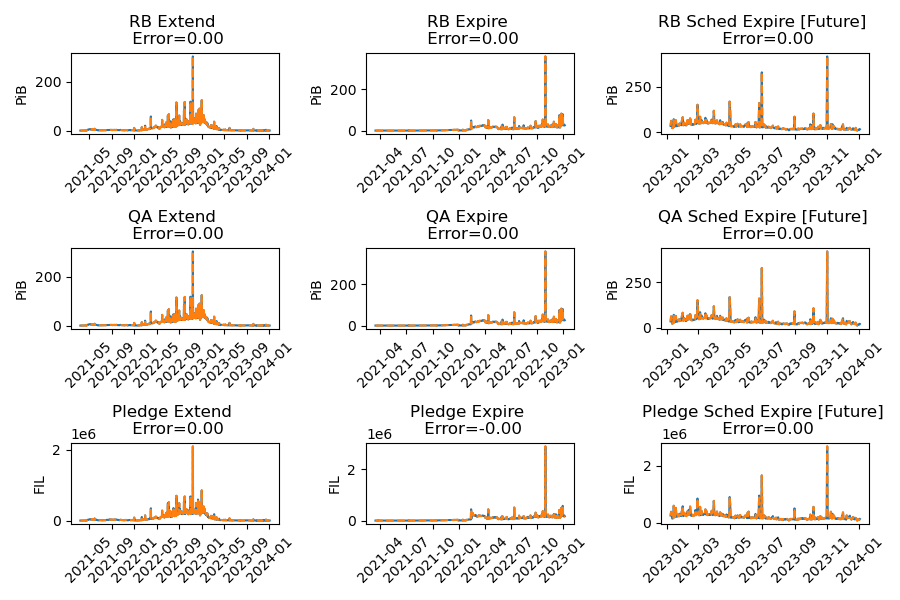

In [10]:
plt.figure(figsize=(9,6))

end_date_minus_one = end_date-timedelta(days=1)  # I guess this is how often the starboard backend is updated 
scheduled_df_merged_upto_today = scheduled_df_merged[scheduled_df_merged['date'] <= pd.to_datetime(end_date_minus_one, utc='UTC')]
scheduled_df_merged_future = scheduled_df_merged[scheduled_df_merged['date'] > pd.to_datetime(end_date_minus_one, utc='UTC')]

plt.subplot(3,3,1)
error = get_err(scheduled_df_merged, 'extended_rb')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_extended_rb'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_extended_rb'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('RB Extend \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,3,2)
error = get_err(scheduled_df_merged_upto_today, 'expired_rb')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged_upto_today['date'], error)
else:
    plt.plot(scheduled_df_merged_upto_today['date'], scheduled_df_merged_upto_today['starboard_expired_rb'])
    plt.plot(scheduled_df_merged_upto_today['date'], scheduled_df_merged_upto_today['spacescope_expired_rb'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('RB Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,3,3)
error = scheduled_df_merged_future['spacescope_expired_rb'] - scheduled_df_merged_future['starboard_open_rb']
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged_future['date'], error)
else:
    plt.plot(scheduled_df_merged_future['date'], scheduled_df_merged_future['starboard_open_rb'])
    plt.plot(scheduled_df_merged_future['date'], scheduled_df_merged_future['spacescope_expired_rb'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('RB Sched Expire [Future] \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,3,4)
error = get_err(scheduled_df_merged, 'extended_qa')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_extended_qa'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_extended_qa'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('QA Extend \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,3,5)
error = get_err(scheduled_df_merged_upto_today, 'expired_qa')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged_upto_today['date'], error)
else:
    plt.plot(scheduled_df_merged_upto_today['date'], scheduled_df_merged_upto_today['starboard_expired_qa'])
    plt.plot(scheduled_df_merged_upto_today['date'], scheduled_df_merged_upto_today['spacescope_expired_qa'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('QA Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,3,6)
error = scheduled_df_merged_future['spacescope_expired_qa'] - scheduled_df_merged_future['starboard_open_qa']
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged_future['date'], error)
else:
    plt.plot(scheduled_df_merged_future['date'], scheduled_df_merged_future['starboard_open_qa'])
    plt.plot(scheduled_df_merged_future['date'], scheduled_df_merged_future['spacescope_expired_qa'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('QA Sched Expire [Future] \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,3,7)
error = get_err(scheduled_df_merged, 'extended_pledge')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_extended_pledge'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_extended_pledge'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('Pledge Extend \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('FIL')

plt.subplot(3,3,8)
error = get_err(scheduled_df_merged_upto_today, 'expired_pledge')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged_upto_today['date'], error)
else:
    plt.plot(scheduled_df_merged_upto_today['date'], scheduled_df_merged_upto_today['starboard_expired_pledge'])
    plt.plot(scheduled_df_merged_upto_today['date'], scheduled_df_merged_upto_today['spacescope_expired_pledge'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('Pledge Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('FIL')

plt.subplot(3,3,9)
error = scheduled_df_merged_future['spacescope_expired_pledge'] - scheduled_df_merged_future['starboard_potential_expire_pledge']
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged_future['date'], error)
else:
    plt.plot(scheduled_df_merged_future['date'], scheduled_df_merged_future['starboard_potential_expire_pledge'])
    plt.plot(scheduled_df_merged_future['date'], scheduled_df_merged_future['spacescope_expired_pledge'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('Pledge Sched Expire [Future] \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('FIL')
# plt.subplot(3,3,9)
# error = scheduled_df_merged['spacescope_schedule_expire_pledge'] - scheduled_df_merged['starboard_potential_expire_pledge']
# if np.sum(error) > 0:
#     plt.plot(scheduled_df_merged['date'], error)
# else:
#     plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_potential_expire_pledge'])
#     plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_schedule_expire_pledge'], linestyle='--')    
# plt.xticks(rotation=45)
# plt.title('Pledge Sched Expire \n Error=%0.02f' % (np.sum(error),))
# plt.ylabel('FIL')

plt.tight_layout()

<IPython.core.display.Javascript object>


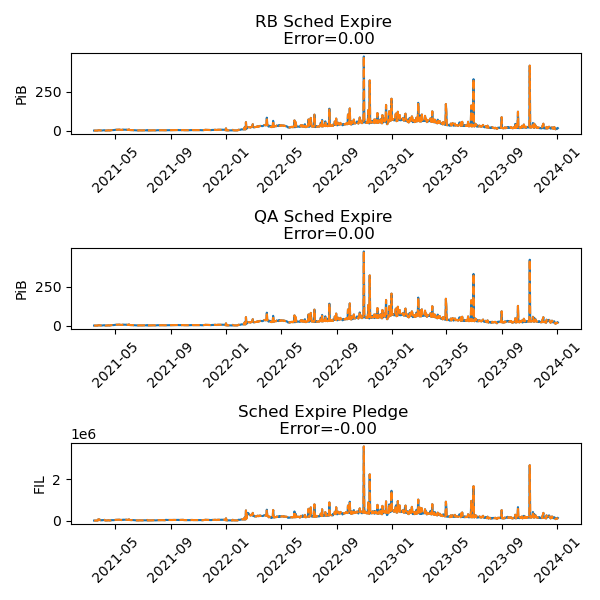

In [11]:
plt.figure(figsize=(6,6))
plt.subplot(3,1,1)

error = get_err(scheduled_df_merged, 'schedule_expire_rb')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_schedule_expire_rb'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_schedule_expire_rb'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('RB Sched Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,1,2)
error = get_err(scheduled_df_merged, 'schedule_expire_qa')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_schedule_expire_qa'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_schedule_expire_qa'], linestyle='--')
plt.xticks(rotation=45)
plt.title('QA Sched Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,1,3)
error = get_err(scheduled_df_merged, 'schedule_expire_pledge')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_schedule_expire_pledge'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_schedule_expire_pledge'], linestyle='--')
plt.xticks(rotation=45)
plt.title('Sched Expire Pledge \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('FIL')

plt.tight_layout()

<IPython.core.display.Javascript object>


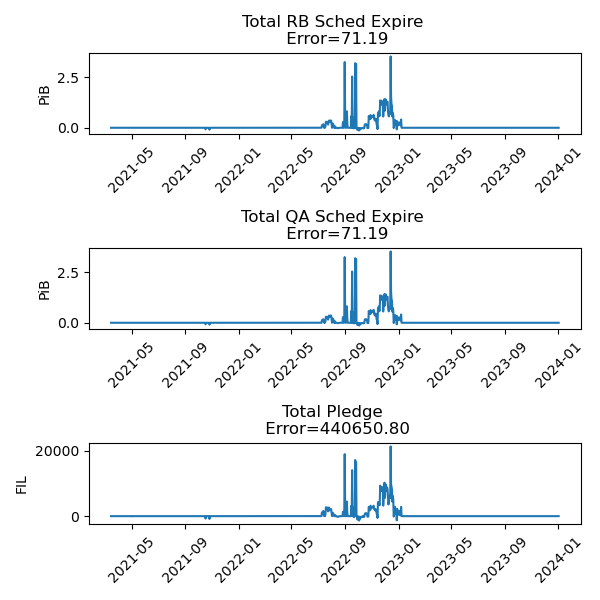

In [12]:
plt.figure(figsize=(6,6))
plt.subplot(3,1,1)

error = get_err(scheduled_df_merged, 'total_rb')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_total_rb'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_total_rb'], linestyle='--')    
plt.xticks(rotation=45)
plt.title('Total RB Sched Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

# error = scheduled_df_merged['spacescope_schedule_expire_rb'] - scheduled_df_merged['starboard_total_rb']
# if np.sum(error) > 0:
#     plt.plot(scheduled_df_merged['date'], error)
# else:
#     plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_total_rb'])
#     plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_schedule_expire_rb'], linestyle='--')    
# plt.xticks(rotation=45)
# plt.title('Total RB Sched Expire \n Error=%0.02f' % (np.sum(error),))
# plt.ylabel('PiB')

plt.subplot(3,1,2)
error = get_err(scheduled_df_merged, 'total_qa')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_total_qa'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_total_qa'], linestyle='--')
plt.xticks(rotation=45)
plt.title('Total QA Sched Expire \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('PiB')

plt.subplot(3,1,3)
error = get_err(scheduled_df_merged, 'total_pledge')
if np.sum(error) > 0:
    plt.plot(scheduled_df_merged['date'], error)
else:
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['starboard_total_pledge'])
    plt.plot(scheduled_df_merged['date'], scheduled_df_merged['spacescope_total_pledge'], linestyle='--')

plt.xticks(rotation=45)
plt.title('Total Pledge \n Error=%0.02f' % (np.sum(error),))
plt.ylabel('FIL')

plt.tight_layout()